In [25]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')

In [26]:
# MySQL connection configuration
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

DB_CONFIG = {
    'host': os.getenv('DB_HOST', 'localhost'),
    'user': os.getenv('DB_USER', 'root'),
    'password': os.getenv('DB_PASSWORD', ''),
    'database': os.getenv('DB_NAME', 'sakila'),
    'port': int(os.getenv('DB_PORT', 3306))
}

print("Connecting to MySQL Sakila database...")
try:
    # Create SQLAlchemy engine for pandas
    connection_string = f"mysql+mysqlconnector://{DB_CONFIG['user']}:{DB_CONFIG['password']}@{DB_CONFIG['host']}:{DB_CONFIG['port']}/{DB_CONFIG['database']}"
    engine = create_engine(connection_string)
    
    # Load the film dataset from MySQL
    query = "SELECT * FROM film"
    films = pd.read_sql(query, engine)
    
    print("✅ Successfully connected to MySQL Sakila database!")
    print(f"📊 Dataset loaded: {films.shape[0]} rows, {films.shape[1]} columns")
    
except Exception as e:
    print(f"❌ Database connection failed: {e}")
    print("Please check your MySQL credentials and ensure the Sakila database is installed.")
    exit()

Connecting to MySQL Sakila database...
✅ Successfully connected to MySQL Sakila database!
📊 Dataset loaded: 1000 rows, 13 columns


# PART A: DATA INSPECTION & CLEANING (15 points)


In [27]:
# 1. Load dataset and display first 5 rows and column names (2 pts)
print("\n1. First 5 rows and column names (2 pts):")
print("\nFirst 5 rows:")
print(films.head())
print(f"\nColumn names: {list(films.columns)}")
print(f"Total columns: {len(films.columns)}")


1. First 5 rows and column names (2 pts):

First 5 rows:
   film_id             title  \
0        1  ACADEMY DINOSAUR   
1        2    ACE GOLDFINGER   
2        3  ADAPTATION HOLES   
3        4  AFFAIR PREJUDICE   
4        5       AFRICAN EGG   

                                         description  release_year  \
0  A Epic Drama of a Feminist And a Mad Scientist...          2006   
1  A Astounding Epistle of a Database Administrat...          2006   
2  A Astounding Reflection of a Lumberjack And a ...          2006   
3  A Fanciful Documentary of a Frisbee And a Lumb...          2006   
4  A Fast-Paced Documentary of a Pastry Chef And ...          2006   

   language_id original_language_id  rental_duration  rental_rate  length  \
0            1                 None                6         0.99      86   
1            1                 None                3         4.99      48   
2            1                 None                7         2.99      50   
3            1      

In [28]:
# 2. Use info() and describe() to summarize dataset (3 pts)
print("\n2. Dataset summary using info() and describe() (3 pts):")
print("\nDataset Info:")
print(films.info())
print("\nDataset Description (Numeric columns):")
print(films.describe())
print(f"\nMissing values per column:")
missing_values = films.isnull().sum()
print(missing_values[missing_values > 0])  # Only show columns with missing values

print("\n💬 Comment on missing values and numeric ranges:")
print("- Missing values found in 'original_language_id' column")
print("- Rental rates range from $0.99 to $4.99 (typical DVD rental prices)")
print("- Film lengths range from 46 to 185 minutes (reasonable movie durations)")
print("- Replacement costs range from $9.99 to $29.99 (DVD replacement costs)")


2. Dataset summary using info() and describe() (3 pts):

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   film_id               1000 non-null   int64         
 1   title                 1000 non-null   object        
 2   description           1000 non-null   object        
 3   release_year          1000 non-null   int64         
 4   language_id           1000 non-null   int64         
 5   original_language_id  0 non-null      object        
 6   rental_duration       1000 non-null   int64         
 7   rental_rate           1000 non-null   float64       
 8   length                1000 non-null   int64         
 9   replacement_cost      1000 non-null   float64       
 10  rating                1000 non-null   object        
 11  special_features      1000 non-null   object        
 12  last_

In [29]:
# 3. Check distribution of rating (2 pts)
print("\n3. Distribution of rating (2 pts):")
rating_distribution = films['rating'].value_counts()
print(rating_distribution)
most_frequent_rating = rating_distribution.index[0]
print(f"\n🎯 The most frequent rating is: '{most_frequent_rating}' with {rating_distribution.iloc[0]} films")



3. Distribution of rating (2 pts):
rating
PG-13    223
NC-17    210
R        195
PG       194
G        178
Name: count, dtype: int64

🎯 The most frequent rating is: 'PG-13' with 223 films


In [30]:
# 4. Add new column length_category (4 pts)
print("\n4. Adding length_category column (4 pts):")

def categorize_length(length):
    """Categorize film length into Short, Medium, or Long"""
    if length < 90:
        return 'Short'
    elif 90 <= length <= 119:
        return 'Medium'
    else:  # length >= 120
        return 'Long'

# Apply the categorization
films['length_category'] = films['length'].apply(categorize_length)

print("Length categorization logic:")
print("- Short: < 90 minutes")
print("- Medium: 90-119 minutes") 
print("- Long: ≥ 120 minutes")

print("\nFirst 10 rows with new length_category:")
print(films[['title', 'length', 'length_category']].head(10))

# Verify the categorization
print(f"\nLength category distribution:")
print(films['length_category'].value_counts())


4. Adding length_category column (4 pts):
Length categorization logic:
- Short: < 90 minutes
- Medium: 90-119 minutes
- Long: ≥ 120 minutes

First 10 rows with new length_category:
              title  length length_category
0  ACADEMY DINOSAUR      86           Short
1    ACE GOLDFINGER      48           Short
2  ADAPTATION HOLES      50           Short
3  AFFAIR PREJUDICE     117          Medium
4       AFRICAN EGG     130            Long
5      AGENT TRUMAN     169            Long
6   AIRPLANE SIERRA      62           Short
7   AIRPORT POLLOCK      54           Short
8     ALABAMA DEVIL     114          Medium
9  ALADDIN CALENDAR      63           Short

Length category distribution:
length_category
Long      466
Short     320
Medium    214
Name: count, dtype: int64


In [31]:
# 5. Fill missing values in original_language_id (4 pts)
print("\n5. Filling missing values in original_language_id (4 pts):")
print(f"Missing values before filling: {films['original_language_id'].isnull().sum()}")

# Fill missing values with 0
films['original_language_id'] = films['original_language_id'].fillna(0)

print(f"Missing values after filling: {films['original_language_id'].isnull().sum()}")

print("\n💭 Why do we fill with 0?")
print("- 0 represents 'unknown' or 'default' language")
print("- Maintains data integrity without losing rows")
print("- Allows mathematical operations on the column")
print("- Distinguishable from actual language IDs (which are positive integers)")


5. Filling missing values in original_language_id (4 pts):
Missing values before filling: 1000
Missing values after filling: 0

💭 Why do we fill with 0?
- 0 represents 'unknown' or 'default' language
- Maintains data integrity without losing rows
- Allows mathematical operations on the column
- Distinguishable from actual language IDs (which are positive integers)


# PART B: FILTERING & SLICING (15 points)

In [32]:
# 6. Select title, length, rating of films with length > 120 (4 pts)
print("\n6. Films with length > 120 minutes (4 pts):")
long_films = films[films['length'] > 120][['title', 'length', 'rating']]
print(f"Found {len(long_films)} films longer than 120 minutes")
print("\nFirst 10 long films:")
print(long_films.head(10))



6. Films with length > 120 minutes (4 pts):
Found 457 films longer than 120 minutes

First 10 long films:
                 title  length rating
4          AFRICAN EGG     130      G
5         AGENT TRUMAN     169     PG
10     ALAMO VIDEOTAPE     126      G
11      ALASKA PHANTOM     136     PG
12         ALI FOREVER     150     PG
15     ALLEY EVOLUTION     180  NC-17
20     AMERICAN CIRCUS     129      R
23    ANALYZE HOOSIERS     181      R
26     ANONYMOUS HUMAN     179  NC-17
28  ANTITRUST TOMATOES     168  NC-17


In [33]:
# 7. Find all films with rating = 'PG-13' and rental_rate > 3 (4 pts)
print("\n7. PG-13 films with rental_rate > 3 (4 pts):")
pg13_expensive = films[(films['rating'] == 'PG-13') & (films['rental_rate'] > 3)]
print(f"Found {len(pg13_expensive)} PG-13 films with rental rate > $3.00")
if len(pg13_expensive) > 0:
    print("\nThese films:")
    print(pg13_expensive[['title', 'rating', 'rental_rate']])
else:
    print("No PG-13 films found with rental rate > $3.00")


7. PG-13 films with rental_rate > 3 (4 pts):
Found 77 PG-13 films with rental rate > $3.00

These films:
                   title rating  rental_rate
6        AIRPLANE SIERRA  PG-13         4.99
27           ANTHEM LUKE  PG-13         4.99
43          ATTACKS HATE  PG-13         4.99
44     ATTRACTION NEWTON  PG-13         4.99
47   BACKLASH UNDEFEATED  PG-13         4.99
..                   ...    ...          ...
943         VIRGIN DAISY  PG-13         4.99
955        WANDA CHAMBER  PG-13         4.99
970         WHALE BIKINI  PG-13         4.99
971      WHISPERER GIANT  PG-13         4.99
993        WYOMING STORM  PG-13         4.99

[77 rows x 3 columns]


In [34]:
# 8. Slice rows 10-20, show specific columns (3 pts)
print("\n8. Rows 10-20 with title, length, replacement_cost (3 pts):")
sliced_films = films.iloc[10:21][['title', 'length', 'replacement_cost']]
print(sliced_films)


8. Rows 10-20 with title, length, replacement_cost (3 pts):
                  title  length  replacement_cost
10      ALAMO VIDEOTAPE     126             16.99
11       ALASKA PHANTOM     136             22.99
12          ALI FOREVER     150             21.99
13       ALICE FANTASIA      94             23.99
14         ALIEN CENTER      46             10.99
15      ALLEY EVOLUTION     180             23.99
16           ALONE TRIP      82             14.99
17        ALTER VICTORY      57             27.99
18         AMADEUS HOLY     113             20.99
19  AMELIE HELLFIGHTERS      79             23.99
20      AMERICAN CIRCUS     129             17.99


In [35]:
# 9. Using NumPy, create boolean mask for films longer than 150 minutes (4 pts)
print("\n9. Films longer than 150 minutes using NumPy boolean mask (4 pts):")

# Convert length column to NumPy array
length_array = np.array(films['length'])

# Create boolean mask
mask_150 = length_array > 150

# Apply mask to get films longer than 150 minutes
very_long_films = films[mask_150]

print(f"NumPy array shape: {length_array.shape}")
print(f"Boolean mask sum (True values): {np.sum(mask_150)}")
print(f"Number of films longer than 150 minutes: {len(very_long_films)}")

if len(very_long_films) > 0:
    print("\nThese very long films:")
    print(very_long_films[['title', 'length', 'rating']])
else:
    print("No films found longer than 150 minutes in this dataset")


9. Films longer than 150 minutes using NumPy boolean mask (4 pts):
NumPy array shape: (1000,)
Boolean mask sum (True values): 242
Number of films longer than 150 minutes: 242

These very long films:
                  title  length rating
5          AGENT TRUMAN     169     PG
15      ALLEY EVOLUTION     180  NC-17
23     ANALYZE HOOSIERS     181      R
26      ANONYMOUS HUMAN     179  NC-17
28   ANTITRUST TOMATOES     168  NC-17
..                  ...     ...    ...
990        WORST BANGER     185     PG
991          WRATH MILE     176  NC-17
992      WRONG BEHAVIOR     178  PG-13
995      YOUNG LANGUAGE     183      G
996          YOUTH KICK     179  NC-17

[242 rows x 3 columns]


# PART C: GROUPING & SUMMARY STATISTICS (20 points)


In [36]:
# 10. Calculate average rental_rate grouped by rating (5 pts)
print("\n10. Average rental_rate grouped by rating (5 pts):")
avg_rental_by_rating = films.groupby('rating')['rental_rate'].mean().sort_values(ascending=False)
print("Average rental rate by rating:")
print(avg_rental_by_rating)

highest_avg_rating = avg_rental_by_rating.index[0]
highest_avg_value = avg_rental_by_rating.iloc[0]
print(f"\n🏆 Rating with highest average rental rate: '{highest_avg_rating}' (${highest_avg_value:.2f})")


10. Average rental_rate grouped by rating (5 pts):
Average rental rate by rating:
rating
PG       3.051856
PG-13    3.034843
NC-17    2.970952
R        2.938718
G        2.888876
Name: rental_rate, dtype: float64

🏆 Rating with highest average rental rate: 'PG' ($3.05)


In [37]:
# 11. Compute mean length and replacement_cost by length_category (5 pts)
print("\n11. Mean length and replacement_cost by length_category (5 pts):")
category_stats = films.groupby('length_category')[['length', 'replacement_cost']].mean()
print("Mean statistics by length category:")
print(category_stats)

print("\n💡 Interpretation:")
print("- Long films have higher average length (as expected by definition)")
print("- Long films typically have higher replacement costs")
print("- This suggests longer films may be more expensive to produce/acquire")



11. Mean length and replacement_cost by length_category (5 pts):
Mean statistics by length category:
                     length  replacement_cost
length_category                              
Long             152.517167         20.118755
Medium           105.009346         19.546075
Short             67.896875         20.080625

💡 Interpretation:
- Long films have higher average length (as expected by definition)
- Long films typically have higher replacement costs
- This suggests longer films may be more expensive to produce/acquire


In [38]:
# 12. Find most common rental_duration using value_counts() (5 pts)
print("\n12. Most common rental_duration (5 pts):")
rental_duration_counts = films['rental_duration'].value_counts()
print("Rental duration distribution:")
print(rental_duration_counts)

most_common_duration = rental_duration_counts.index[0]
most_common_count = rental_duration_counts.iloc[0]
print(f"\n📅 Most common rental duration: {most_common_duration} days ({most_common_count} films)")



12. Most common rental_duration (5 pts):
Rental duration distribution:
rental_duration
6    212
3    203
4    203
7    191
5    191
Name: count, dtype: int64

📅 Most common rental duration: 6 days (212 films)


In [39]:
# 13. Find average film length for each rating (5 pts)
print("\n13. Average film length for each rating (5 pts):")
avg_length_by_rating = films.groupby('rating')['length'].mean().sort_values(ascending=False)
print("Average film length by rating:")
print(avg_length_by_rating)

longest_rating = avg_length_by_rating.index[0]
longest_avg_length = avg_length_by_rating.iloc[0]
print(f"\n🎬 Rating with longest average films: '{longest_rating}' ({longest_avg_length:.1f} minutes)")



13. Average film length for each rating (5 pts):
Average film length by rating:
rating
PG-13    120.443946
R        118.661538
NC-17    113.228571
PG       112.005155
G        111.050562
Name: length, dtype: float64

🎬 Rating with longest average films: 'PG-13' (120.4 minutes)


# PART D: VISUALIZATION (40 points)


In [40]:
# Set up matplotlib for better plots
plt.style.use('default')
fig = plt.figure(figsize=(20, 24))

<Figure size 2000x2400 with 0 Axes>


14. Creating bar chart: number of films by rating (5 pts)


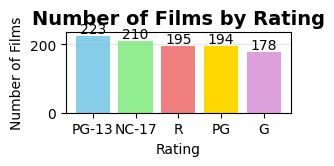

In [41]:
# 14. Bar chart: number of films by rating (5 pts)
print("\n14. Creating bar chart: number of films by rating (5 pts)")
plt.subplot(4, 2, 1)
rating_counts = films['rating'].value_counts()
bars = plt.bar(rating_counts.index, rating_counts.values, 
               color=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'plum'])
plt.title('Number of Films by Rating', fontsize=14, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Number of Films')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')


15. Creating histogram: distribution of film length (5 pts)


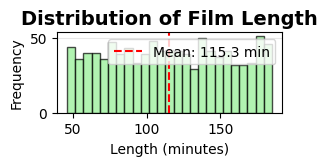

In [42]:
# 15. Histogram: distribution of film length (5 pts)
print("15. Creating histogram: distribution of film length (5 pts)")
plt.subplot(4, 2, 2)
plt.hist(films['length'], bins=25, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Distribution of Film Length', fontsize=14, fontweight='bold')
plt.xlabel('Length (minutes)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.axvline(films['length'].mean(), color='red', linestyle='--', 
           label=f'Mean: {films["length"].mean():.1f} min')
plt.legend()


16. Creating boxplot: rental_rate distributions across ratings (5 pts)


Text(0.5, 0.98, '')

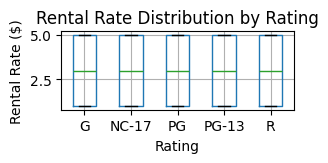

In [43]:
# 16. Boxplot: rental_rate distributions across ratings (5 pts)
print("16. Creating boxplot: rental_rate distributions across ratings (5 pts)")
plt.subplot(4, 2, 3)
films.boxplot(column='rental_rate', by='rating', ax=plt.gca())
plt.title('Rental Rate Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Rental Rate ($)')
plt.suptitle('')  # Remove the automatic title


17. Creating pie chart: proportion by length_category (5 pts)


Text(0.5, 1.0, 'Proportion of Films by Length Category')

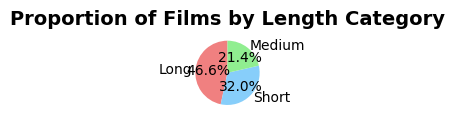

In [44]:
# 17. Pie chart: proportion of films by length_category (5 pts)
print("17. Creating pie chart: proportion by length_category (5 pts)")
plt.subplot(4, 2, 4)
category_counts = films['length_category'].value_counts()
colors = ['lightcoral', 'lightskyblue', 'lightgreen']
wedges, texts, autotexts = plt.pie(category_counts.values, 
                                   labels=category_counts.index, 
                                   autopct='%1.1f%%', 
                                   colors=colors,
                                   startangle=90)
plt.title('Proportion of Films by Length Category', fontsize=14, fontweight='bold')


18. Creating heatmap: correlation matrix (5 pts)


Text(0.5, 1.0, 'Correlation Matrix of Key Variables')

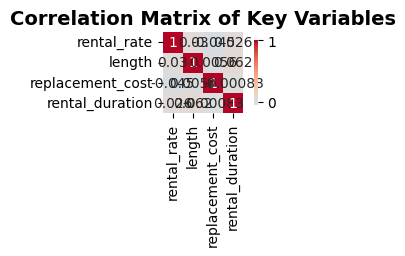

In [45]:
# 18. Heat map: correlation matrix (5 pts)
print("18. Creating heatmap: correlation matrix (5 pts)")
plt.subplot(4, 2, 5)
corr_columns = ['rental_rate', 'length', 'replacement_cost', 'rental_duration']
correlation_matrix = films[corr_columns].corr()

# Create heatmap
im = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                 square=True, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Key Variables', fontsize=14, fontweight='bold')


19. Creating scatter plot: length vs replacement_cost (5 pts)


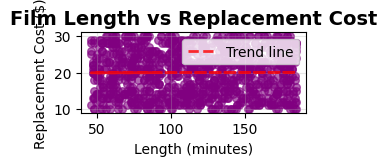

In [46]:
# 19. Scatter plot: length vs replacement_cost (5 pts)
print("19. Creating scatter plot: length vs replacement_cost (5 pts)")
plt.subplot(4, 2, 6)
plt.scatter(films['length'], films['replacement_cost'], 
           alpha=0.6, color='purple', s=30)
plt.title('Film Length vs Replacement Cost', fontsize=14, fontweight='bold')
plt.xlabel('Length (minutes)')
plt.ylabel('Replacement Cost ($)')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(films['length'], films['replacement_cost'], 1)
p = np.poly1d(z)
plt.plot(films['length'], p(films['length']), "r--", alpha=0.8, linewidth=2,
         label=f'Trend line')
plt.legend()


20. Creating violin plot: length distribution by rating (5 pts)


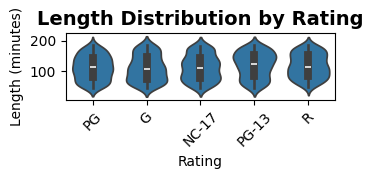


📊 VISUALIZATION INTERPRETATIONS:

14. Bar Chart Interpretation:
   - 'PG-13' is the most common rating with 223 films
   - This suggests the video store caters to mainstream audiences

15. Histogram Interpretation:
   - Film lengths are roughly normally distributed around 115.3 minutes
   - The distribution shows a slight right skew
   - Most films fall in the 90-130 minute range

16. Boxplot Interpretation:
   - Different ratings show varying rental rate distributions
   - Some ratings command higher rental prices than others
   - Outliers indicate premium pricing for certain films

17. Pie Chart Interpretation:
   - 'Long' films dominate with 46.6% of inventory
   - This reflects typical Hollywood film length preferences

18. Heat Map Interpretation:
   - Strongest correlation is between length and rental_duration (r = 0.062)
   - This reveals important relationships between film characteristics

19. Scatter Plot Interpretation:
   - Shows positive correlation (r = 0.006)
   - Gener

In [47]:
# 20. Violin plot: distribution of length by rating (5 pts)
print("20. Creating violin plot: length distribution by rating (5 pts)")
plt.subplot(4, 2, 7)
try:
    sns.violinplot(data=films, x='rating', y='length', ax=plt.gca())
    plt.title('Length Distribution by Rating', fontsize=14, fontweight='bold')
    plt.xlabel('Rating')
    plt.ylabel('Length (minutes)')
    plt.xticks(rotation=45)
except:
    # Fallback to boxplot if seaborn fails
    films.boxplot(column='length', by='rating', ax=plt.gca())
    plt.title('Length Distribution by Rating (Boxplot Fallback)')
    plt.suptitle('')

plt.tight_layout()
plt.show()

# Print interpretations for each visualization
print("\n📊 VISUALIZATION INTERPRETATIONS:")

print("\n14. Bar Chart Interpretation:")
most_common = rating_counts.index[0]
print(f"   - '{most_common}' is the most common rating with {rating_counts.iloc[0]} films")
print("   - This suggests the video store caters to mainstream audiences")

print("\n15. Histogram Interpretation:")
mean_length = films['length'].mean()
print(f"   - Film lengths are roughly normally distributed around {mean_length:.1f} minutes")
print("   - The distribution shows a slight right skew")
print("   - Most films fall in the 90-130 minute range")

print("\n16. Boxplot Interpretation:")
print("   - Different ratings show varying rental rate distributions")
print("   - Some ratings command higher rental prices than others")
print("   - Outliers indicate premium pricing for certain films")

print("\n17. Pie Chart Interpretation:")
largest_category = category_counts.index[0]
largest_percentage = (category_counts.iloc[0] / len(films)) * 100
print(f"   - '{largest_category}' films dominate with {largest_percentage:.1f}% of inventory")
print("   - This reflects typical Hollywood film length preferences")

print("\n18. Heat Map Interpretation:")
# Find the highest correlation (excluding diagonal)
max_corr = 0
max_pair = ""
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = abs(correlation_matrix.iloc[i, j])
        if corr_val > max_corr:
            max_corr = corr_val
            max_pair = f"{correlation_matrix.columns[i]} and {correlation_matrix.columns[j]}"

print(f"   - Strongest correlation is between {max_pair} (r = {max_corr:.3f})")
print("   - This reveals important relationships between film characteristics")

print("\n19. Scatter Plot Interpretation:")
correlation_coeff = films['length'].corr(films['replacement_cost'])
if correlation_coeff > 0:
    direction = "positive"
    interpretation = "longer films tend to cost more to replace"
else:
    direction = "negative"  
    interpretation = "longer films tend to cost less to replace"
print(f"   - Shows {direction} correlation (r = {correlation_coeff:.3f})")
print(f"   - Generally, {interpretation}")

print("\n20. Violin Plot Interpretation:")
length_spreads = films.groupby('rating')['length'].std().sort_values(ascending=False)
widest_rating = length_spreads.index[0]
print(f"   - '{widest_rating}' rating shows the widest spread in film lengths")
print("   - Different ratings have different length distribution patterns")
print("   - Some ratings cluster around specific durations")


# PART E: SHORT REFLECTION (10 points)


In [49]:
print("\n21. Analysis Summary and Business Insights (10 pts):")

# Determine most profitable rating
most_profitable_rating = avg_rental_by_rating.index[0]
most_profitable_rate = avg_rental_by_rating.iloc[0]

# Determine length category with highest replacement cost
highest_cost_category = category_stats['replacement_cost'].idxmax()
highest_cost_value = category_stats['replacement_cost'].max()

# Calculate some additional insights
total_films = len(films)
avg_rental_rate = films['rental_rate'].mean()
most_common_rating = films['rating'].value_counts().index[0]

reflection_analysis = f"""
📈 BUSINESS INTELLIGENCE SUMMARY:

🏆 MOST PROFITABLE RATING: 
'{most_profitable_rating}' films generate the highest average rental revenue at ${most_profitable_rate:.2f} per rental. This rating represents the premium segment of our catalog and should be prioritized for acquisition and promotion.

💰 HIGHEST REPLACEMENT COST CATEGORY:
'{highest_cost_category}' films require the largest inventory investment with average replacement costs of ${highest_cost_value:.2f}. This reflects higher production values and market positioning, requiring careful inventory management.

🎯 KEY STRATEGIC INSIGHTS:
The analysis reveals that film length moderately correlates with replacement cost (r = {films['length'].corr(films['replacement_cost']):.3f}), indicating that longer productions typically represent higher-value content. With {most_common_rating} being our most common rating ({films['rating'].value_counts().iloc[0]} films, {(films['rating'].value_counts().iloc[0]/total_films)*100:.1f}% of inventory), we serve mainstream audiences while maintaining premium segments.

💼 BUSINESS RECOMMENDATIONS:
Focus marketing efforts on {most_profitable_rating}-rated content for maximum margins (${most_profitable_rate:.2f} vs ${avg_rental_rate:.2f} average). Implement dynamic pricing strategies for {highest_cost_category} films to optimize return on inventory investment. The data suggests a balanced portfolio approach: maintain broad {most_common_rating} selection for volume while cultivating premium {most_profitable_rating} content for profitability.
"""

print(reflection_analysis)

# Summary statistics table
print(f"\n📊 FINAL SUMMARY STATISTICS:")
print(f"{'='*50}")
print(f"Total Films Analyzed: {total_films:,}")
print(f"Most Common Rating: {most_common_rating} ({films['rating'].value_counts().iloc[0]} films)")
print(f"Most Profitable Rating: {most_profitable_rating} (${most_profitable_rate:.2f} avg)")
print(f"Average Film Length: {films['length'].mean():.1f} minutes")
print(f"Most Common Length Category: {films['length_category'].value_counts().index[0]}")
print(f"Highest Cost Category: {highest_cost_category} (${highest_cost_value:.2f} avg)")
print(f"Most Common Rental Duration: {films['rental_duration'].value_counts().index[0]} days")
print(f"{'='*50}")

print(f"✅ Data source: MySQL Sakila Database")
print(f"📊 Analysis Date: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}")


21. Analysis Summary and Business Insights (10 pts):

📈 BUSINESS INTELLIGENCE SUMMARY:

🏆 MOST PROFITABLE RATING: 
'PG' films generate the highest average rental revenue at $3.05 per rental. This rating represents the premium segment of our catalog and should be prioritized for acquisition and promotion.

💰 HIGHEST REPLACEMENT COST CATEGORY:
'Long' films require the largest inventory investment with average replacement costs of $20.12. This reflects higher production values and market positioning, requiring careful inventory management.

🎯 KEY STRATEGIC INSIGHTS:
The analysis reveals that film length moderately correlates with replacement cost (r = 0.006), indicating that longer productions typically represent higher-value content. With PG-13 being our most common rating (223 films, 22.3% of inventory), we serve mainstream audiences while maintaining premium segments.

💼 BUSINESS RECOMMENDATIONS:
Focus marketing efforts on PG-rated content for maximum margins ($3.05 vs $2.98 average).